# Data Science Basics

Welcome to the data science workshop!  

## Thinking in arrays

The first thing we want to do is import the packages that we will need. For now, this includes:
* NumPy: Stands for NUMeric PYthon. The de-facto library for handling matrices and vectors in Python which provides a wide array of mathematical functions.
* Pandas: Most common library for handling data. Think of it as a superpowered Excel.
* Matplotlib: A library for constructing plots.  
* Seaborn: An extension built on top of matplotlib that makes nicer plots.

In [2]:
# Import packages that we will need to use.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Let's start with something easy! Let's plot our favorite quadratic function $f: \mathbb{R} \rightarrow \mathbb{R}$ where $f(x) = x^2$.

In [3]:
X = np.linspace(-5, 5, 6)
X

array([-5., -3., -1.,  1.,  3.,  5.])

Essentially, the $\texttt{linspace}$ function generates 6 numbers equally spaced between $-5$ and $5$, including the endpoints. Now, let's apply our function $f$.

In [4]:
Y = X ** 2
Y

array([25.,  9.,  1.,  1.,  9., 25.])

Now, we have our $x$ and $y$ values, but our problem is that they are isolated. Let's put them into a table - a data structure we will now refer to as a _dataframe_.

In [5]:
df = pd.DataFrame({'x': X, 'f(x)': Y})
df

,x,f(x)
0,-5.0,25.0
1,-3.0,9.0
2,-1.0,1.0
3,1.0,1.0
4,3.0,9.0
5,5.0,25.0


This looks more like something we are used to! Or maybe, this?

In [6]:
pd.DataFrame.transpose(df)

,0,1,2,3,4,5
x,-5.0,-3.0,-1.0,1.0,3.0,5.0
f(x),25.0,9.0,1.0,1.0,9.0,25.0


Now, all we have to do is plot it!

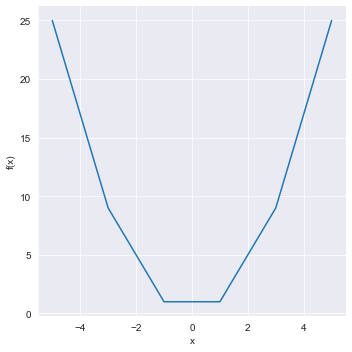

In [7]:
sns.set_style('darkgrid')
sns.relplot(x="x", y="f(x)", kind="line", data=df)

That looks _about_ right but not quite right. Let's reorganize our previous code and add more data points.

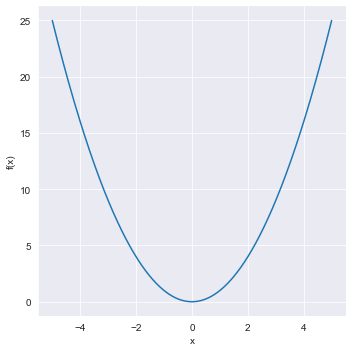

In [8]:
X = np.linspace(-5, 5, 1000)
Y = X ** 2
df = pd.DataFrame({'x': X, 'f(x)': Y})
sns.relplot(x="x", y="f(x)", kind="line", data=df)

### What is a statistical problem?

What we have done so far is cool and all, but it's not really data science. Where's the data? Where's the science? We need to construct an actual data science problem so that we know what we are dealing with. First, let's create some data that simulates the following function $g: \mathbb{R} \rightarrow \mathbb{R}$

$$ g(x) = 0.81x + 0.37x^2$$

In [9]:
X = np.linspace(-5.0, 5.0, 100)
Y = X * 0.81 + (X ** 2) * 0.37
df = pd.DataFrame({'x': X, 'g(x)': Y})
df.head(5)

,x,g(x)
0,-5.00000,5.200000
1,-4.89899,4.911856
2,-4.79798,4.631262
3,-4.69697,4.358219
4,-4.59596,4.092725


Now, let's plot it and see what it looks like.

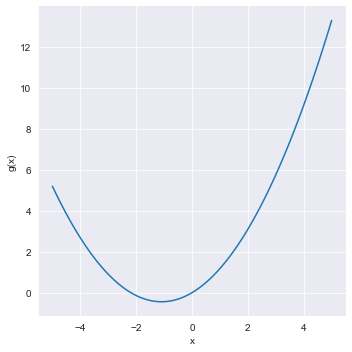

In [10]:
sns.relplot(x='x', y='g(x)', kind='line', data=df)

We are now going to create some **noisy** data. Essentially, we are going to draw $100$ numbers from $\mathcal{N}(0,1)$ distribution -- one for each $x$ point we have -- and add the random number to the correct $g(x)$ value. Let's do that!

In [11]:
Y2 = (X * 0.81 + (X ** 2) * 0.37) + np.random.normal(0,1,100)
Y2[:5]

array([6.30770102, 4.50423978, 3.56347205, 5.83279825, 5.17253726])

Let's call this $G$: it is a noisy realization of our true function $g$. Let's also convert it into a dataframe.

In [12]:
df_error = pd.DataFrame({'G(x)': Y2})
df_error.head(5)

,G(x)
0,6.307701
1,4.504240
2,3.563472
3,5.832798
4,5.172537


It will be much easier if we can see the difference between the true $g$ and the noisy $G$ side by side. So let's **concatenate** the two dataframes ...

In [13]:
df = pd.concat([df, df_error], axis=1)
df.head(5)

,x,g(x),G(x)
0,-5.00000,5.200000,6.307701
1,-4.89899,4.911856,4.504240
2,-4.79798,4.631262,3.563472
3,-4.69697,4.358219,5.832798
4,-4.59596,4.092725,5.172537


... and plot them together!

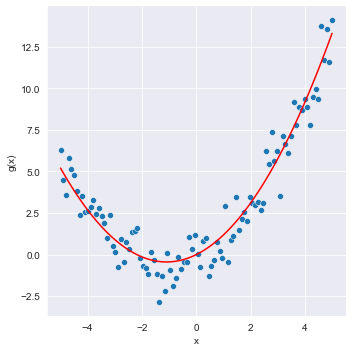

In [14]:
p = sns.relplot(x='x', y='G(x)', data=df, kind='scatter')
p.map_dataframe(sns.lineplot, 'x', 'g(x)', color='r')

This brings us to the crux of the problem. In reality, almost all the data we collect is noisy when what we are truly interested in is the true function $g$. The goal of data science is to use statistical techniques to figure out what $g$ is. We can use our estimation of $g$ which we can call $\hat{g}$ for many different purposes but for this workshop we are concerned with the purpose of prediction. That is, if I give you a random value of $x$ can you come up with some estimated function $\hat{g}$ that is as close to the correct value of $g(x)$ as possible? For example, consider the following model:

$$\hat{g}_1(x) = 0.125e^{x}$$

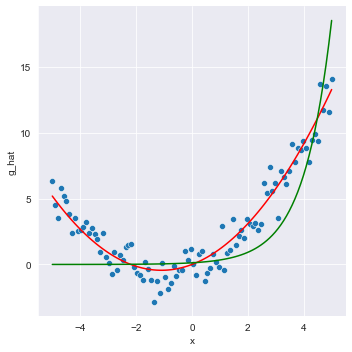

In [15]:
df = pd.concat([df, pd.DataFrame({'g_hat':np.exp(X)*0.125})], axis=1)
p = sns.relplot(x='x', y='G(x)', data=df, kind='scatter')
p.map_dataframe(sns.lineplot, 'x', 'g(x)', color='r')
p.map_dataframe(sns.lineplot, 'x', 'g_hat', color='g', )

## Onto the main business

Since we now know what a general data science problem might look like, let's tackle one and see what sort of prediction we can make.

In [16]:
#%reset -f

### Dataset of the Day

Our goal for today is to be able to predict the percentage of the student body that graduates in a class year -- i.e the graduation rate -- given some descriptors for a particular college. We will use statistics from 777 US Colleges from the 1995 issue of the US News report. If you are using Jupyter, please go to https://www.statlearning.com/resources-second-edition, scroll down to the Data Sets drop down menu and click on the **College.csv** file to download it. Then move the file from your Downloads folder to wherever your notebook file is. If you are using Google Colab, use the following command.

In [17]:
#!wget https://www.statlearning.com/s/College.csv

Now, that we have the dataset on hand, let's mess around with it.

In [18]:
df = pd.read_csv("College.csv")
df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


We see that we have rows which correspond to particular colleges with columns that provide descriptors for that college -- this includes things like the number of applications, acceptances, out of state tuition, student faculty ratio, etc. What we want to predict using these _features_ is the final column: the graduation rate.

For some interesting results ...

In [19]:
df.iloc[123,:]

Unnamed: 0     Colgate University
Private                       Yes
Apps                         4856
Accept                       2492
Enroll                        727
Top10perc                      46
Top25perc                      75
F.Undergrad                  2649
P.Undergrad                    25
Outstate                    19510
Room.Board                   5565
Books                         500
Personal                      750
PhD                            95
Terminal                       98
S.F.Ratio                    10.5
perc.alumni                    45
Expend                      15494
Grad.Rate                      93
Name: 123, dtype: object

### Data Analysis Pipeline

![pipeline](pipeline.png)

### Preprocessing the dataset

First, we don't need to consider the name column. For our purposes, it doesn't matter what the name of the college is so let's remove it.

In [20]:
df = df.drop(['Unnamed: 0'], axis=1)

Now, it's much easier and convenient -- especially for the computer -- to work with only numeric data.

In [21]:
df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})

If we take a quick look at our dataset at this point...

In [22]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


Now, let's look for some weird stuff!

We can check to see if there are any values that are missing.

In [23]:
df[df.isna().any(axis=1)]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In the real world, we might not always be so lucky -- so it is always a good idea to check if there are values missing. If you find some, you can make the decision to either **impute** them or remove the rows entirely.

Now, let's try and see if we can find any features that may be useful in predicting the graduation rate.

<AxesSubplot:xlabel='Apps', ylabel='Grad.Rate'>

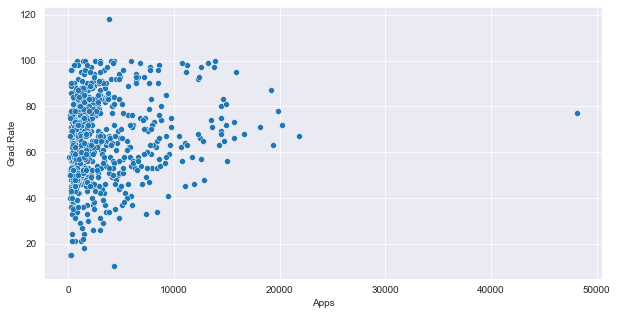

In [24]:
sns.scatterplot(x='Apps',y='Grad.Rate',data=df)

We see one school that has a graduation rate of $\approx 120\%$!

<AxesSubplot:xlabel='Private', ylabel='Grad.Rate'>

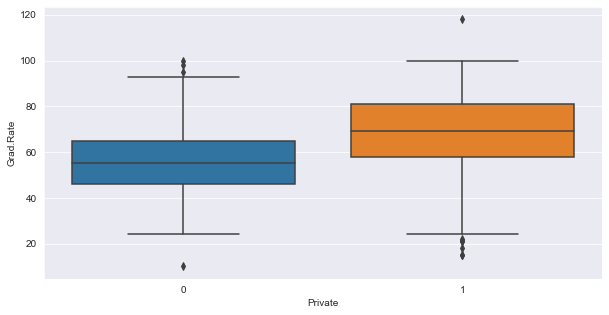

In [25]:
sns.boxplot(x='Private',y='Grad.Rate',data=df)

<AxesSubplot:xlabel='Top10perc', ylabel='Grad.Rate'>

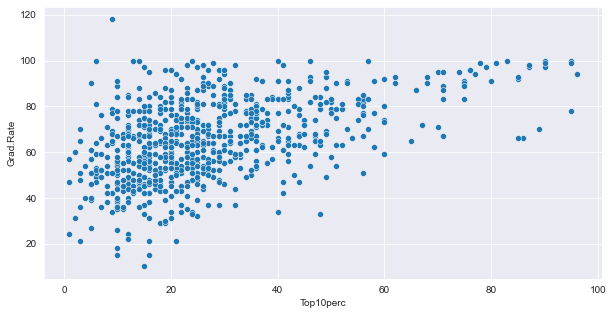

In [26]:
sns.scatterplot(x='Top10perc',y='Grad.Rate',data=df)

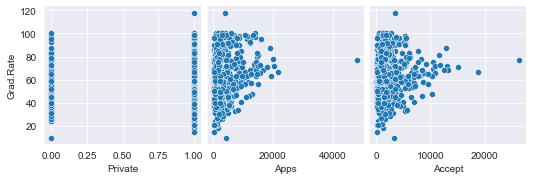

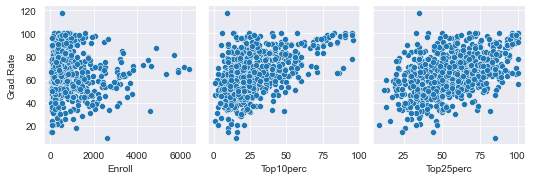

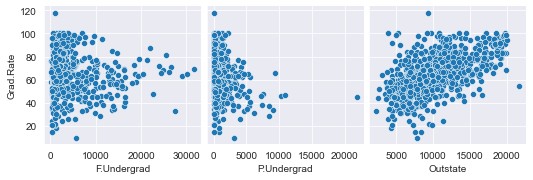

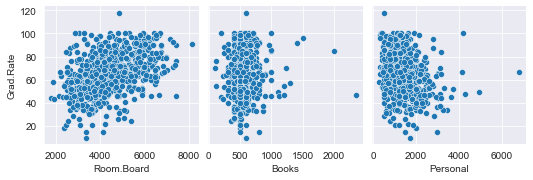

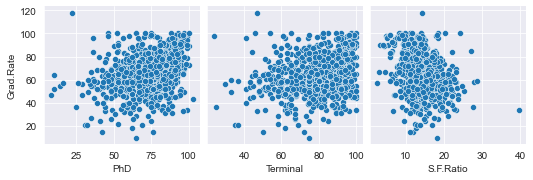

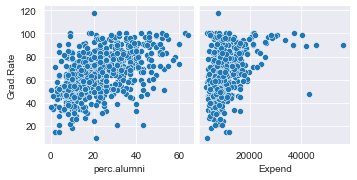

In [52]:
ind_v = list(df.columns)[:-1]
rows = [(i,i+3) for i in [0,3,6,9,12,15]]
for i in rows:
    first, last = i
    sns.pairplot(data=df, x_vars=ind_v[first:last], y_vars='Grad.Rate')